**Česká správa sociálního zabezpečení (ČSSZ) nabízí spoustu dat ohledně zaměstnanců, zaměstnavatelů, pojištění, důchodů atd. My se podíváme na data o OSVČ a jejich statistiky napříč Českem. Načti si do DataFramu CSV z této adresy. Budou nás zajímat sloupce datum, okres_kod, okres, vykonavana_cinnost_hlavni, zbytek můžeš zahodit. Možná se ti bude hodit, když datum budeš brát fakt jako datum.**

**0.** Pro každý okres je v tabulce několik desítek pozorování v čase (poznáš podle sloupce datum). Pro každé datum zjisti, kolik řádků v DataFramu je - mělo by to odpovídat počtu okresů.

In [1]:
import pandas as pd

In [2]:
osvc = pd.read_csv("osvc.csv")
osvc

,datum,okres_kod,okres,vykonavana_cinnost_hlavni,vykonavana_cinnost_vedlejsi,plati_zalohy_dp_hlavni,plati_zalohy_dp_vedlejsi,dobrovolne_dp,dobrovolne_np
0,2010-03-31,OK.3100,Hlavní město Praha,103361,51850,102232,17172,59,13940
1,2010-03-31,OK.3201,Benešov,6677,3002,6666,786,9,2080
2,2010-03-31,OK.3202,Beroun,5544,2747,5539,743,7,1355
3,2010-03-31,OK.3203,Kladno,8456,4330,8456,1235,4,1956
4,2010-03-31,OK.3204,Kolín,6020,2880,6020,818,15,1551
...,...,...,...,...,...,...,...,...,...
3229,2020-06-30,OK.3807,Ostrava-město,14562,10944,0,0,27,2413
3230,2020-06-30,OK.3808,Přerov,5710,4160,0,0,2,1175
3231,2020-06-30,OK.3809,Šumperk,5421,3946,0,0,1,1231
3232,2020-06-30,OK.3810,Vsetín,8494,5789,0,0,6,2788


In [3]:
osvc.drop(osvc.loc[:, "vykonavana_cinnost_vedlejsi":"dobrovolne_np"], axis=1, inplace=True)
osvc.head()

,datum,okres_kod,okres,vykonavana_cinnost_hlavni
0,2010-03-31,OK.3100,Hlavní město Praha,103361
1,2010-03-31,OK.3201,Benešov,6677
2,2010-03-31,OK.3202,Beroun,5544
3,2010-03-31,OK.3203,Kladno,8456
4,2010-03-31,OK.3204,Kolín,6020


In [4]:
osvc.drop(columns=["okres_kod"], axis=1, inplace=True)
osvc.head()

,datum,okres,vykonavana_cinnost_hlavni
0,2010-03-31,Hlavní město Praha,103361
1,2010-03-31,Benešov,6677
2,2010-03-31,Beroun,5544
3,2010-03-31,Kladno,8456
4,2010-03-31,Kolín,6020


In [5]:
osvc.dtypes

datum                        object
okres                        object
vykonavana_cinnost_hlavni     int64
dtype: object

In [6]:
datum = pd.to_datetime(osvc["datum"], errors="coerce")
datum

0      2010-03-31
1      2010-03-31
2      2010-03-31
3      2010-03-31
4      2010-03-31
          ...    
3229   2020-06-30
3230   2020-06-30
3231   2020-06-30
3232   2020-06-30
3233   2020-06-30
Name: datum, Length: 3234, dtype: datetime64[ns]

In [7]:
osvc.drop("datum", axis=1, inplace=True)
osvc

,okres,vykonavana_cinnost_hlavni
0,Hlavní město Praha,103361
1,Benešov,6677
2,Beroun,5544
3,Kladno,8456
4,Kolín,6020
...,...,...
3229,Ostrava-město,14562
3230,Přerov,5710
3231,Šumperk,5421
3232,Vsetín,8494


In [8]:
osvc = osvc.assign(datum=datum)
osvc

,okres,vykonavana_cinnost_hlavni,datum
0,Hlavní město Praha,103361,2010-03-31
1,Benešov,6677,2010-03-31
2,Beroun,5544,2010-03-31
3,Kladno,8456,2010-03-31
4,Kolín,6020,2010-03-31
...,...,...,...
3229,Ostrava-město,14562,2020-06-30
3230,Přerov,5710,2020-06-30
3231,Šumperk,5421,2020-06-30
3232,Vsetín,8494,2020-06-30


In [9]:
osvc.groupby("datum").count().sort_index()

,okres,vykonavana_cinnost_hlavni
datum,,
2010-03-31,77,77
2010-06-30,77,77
2010-09-30,77,77
2010-12-31,77,77
2011-03-31,77,77
2011-06-30,77,77
2011-09-30,77,77
2011-12-31,77,77
2012-03-31,77,77


In [10]:
osvc["okres"].nunique()

77

**1.** Pro každé datum zjisti, kolik byl celkový počet lidí s živností jako hlavní činností (vykonavana_cinnost_hlavni).

In [11]:
osvc.groupby("datum").agg({"vykonavana_cinnost_hlavni":"sum"})

,vykonavana_cinnost_hlavni
datum,
2010-03-31,633958
2010-06-30,649116
2010-09-30,656224
2010-12-31,640406
2011-03-31,645383
2011-06-30,663991
2011-09-30,667395
2011-12-31,649990
2012-03-31,637845


**2.** Z výsledku předchozího úkolu zkus spočítat, kolik byl každý rok průmerný počet OSVČ (hlavních). Tj. pokud ti v březnu 2019 vyšlo 500000, v září 600000 a v prosinci 650000, budeš chtít mít ve výsledku pro řádek s rokem 2019 hodnotu zhruba 583333.

In [12]:
osvc_ctvrtletne = osvc.groupby("datum").agg({"vykonavana_cinnost_hlavni":"sum"}).reset_index()
osvc_ctvrtletne.head()

,datum,vykonavana_cinnost_hlavni
0,2010-03-31,633958
1,2010-06-30,649116
2,2010-09-30,656224
3,2010-12-31,640406
4,2011-03-31,645383


In [13]:
rok = osvc_ctvrtletne['datum'].dt.year
rok.head()

0    2010
1    2010
2    2010
3    2010
4    2011
Name: datum, dtype: int64

In [14]:
osvc_ctvrtletne = osvc_ctvrtletne.assign(rok=rok)
osvc_ctvrtletne.head()

,datum,vykonavana_cinnost_hlavni,rok
0,2010-03-31,633958,2010
1,2010-06-30,649116,2010
2,2010-09-30,656224,2010
3,2010-12-31,640406,2010
4,2011-03-31,645383,2011


In [15]:
osvc_rocne = osvc_ctvrtletne.groupby("rok").agg({"vykonavana_cinnost_hlavni":"mean"})
osvc_rocne

,vykonavana_cinnost_hlavni
rok,
2010,644926.00
2011,656689.75
2012,640682.50
2013,614723.00
2014,593335.50
2015,585436.00
2016,581811.25
2017,581989.50
2018,589117.50


**3.** Zkus spočítat průměrný počet vykonávaných hlavních činností za rok a okres. Výsledek pak otoč (pivotuj), abys měla v řádcích okresy, ve sloupcích jednotlivé roky (hodnota bude vždy onen průměr pro daný okres a rok). Jakmile bude dopivotováno, zkus dataframe opět převést na ten dlouhý (tj. rok bude pouze jeden sloupec, ne co rok, to sloupec).

In [16]:
rok = osvc['datum'].dt.year
rok.head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: datum, dtype: int64

In [17]:
osvc = osvc.assign(rok=rok)
osvc

,okres,vykonavana_cinnost_hlavni,datum,rok
0,Hlavní město Praha,103361,2010-03-31,2010
1,Benešov,6677,2010-03-31,2010
2,Beroun,5544,2010-03-31,2010
3,Kladno,8456,2010-03-31,2010
4,Kolín,6020,2010-03-31,2010
...,...,...,...,...
3229,Ostrava-město,14562,2020-06-30,2020
3230,Přerov,5710,2020-06-30,2020
3231,Šumperk,5421,2020-06-30,2020
3232,Vsetín,8494,2020-06-30,2020


In [89]:
osvc_rocne_okres = osvc.groupby(["rok", "okres"]).agg({"vykonavana_cinnost_hlavni":"mean"}).reset_index()
osvc_rocne_okres.head()

,rok,okres,vykonavana_cinnost_hlavni
0,2010,Benešov,6794.75
1,2010,Beroun,5656.25
2,2010,Blansko,5283.75
3,2010,Brno-město,24964.25
4,2010,Brno-venkov,12843.25


In [111]:
osvc_rocne_okres_kratka = osvc_rocne_okres.pivot(index='okres', columns='rok', values='vykonavana_cinnost_hlavni')
osvc_rocne_okres_kratka.head()

rok,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
okres,,,,,,,,,,,
Benešov,6794.75,6981.00,6850.50,6567.25,6263.00,6221.75,6169.25,6173.00,6192.50,6298.50,6387.5
Beroun,5656.25,5863.00,5782.75,5616.75,5403.00,5383.25,5415.25,5497.00,5645.00,5812.75,5941.5
Blansko,5283.75,5452.75,5376.75,5193.25,4979.25,4981.50,4958.25,4921.75,4948.25,4973.00,4981.5
Brno-město,24964.25,26164.50,25995.75,25018.25,24136.00,23047.25,21907.50,21602.00,21715.00,22022.25,22248.0
Brno-venkov,12843.25,13427.75,13227.75,12767.75,12481.75,12396.50,12372.50,12435.50,12631.00,12766.25,12834.0


In [120]:
osvc_rocne_okres_kratka.columns.rename("", inplace=True)

In [121]:
osvc_rocne_okres_kratka.columns

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='')

In [122]:
osvc_rocne_okres_kratka.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
okres,,,,,,,,,,,
Benešov,6794.75,6981.00,6850.50,6567.25,6263.00,6221.75,6169.25,6173.00,6192.50,6298.50,6387.5
Beroun,5656.25,5863.00,5782.75,5616.75,5403.00,5383.25,5415.25,5497.00,5645.00,5812.75,5941.5
Blansko,5283.75,5452.75,5376.75,5193.25,4979.25,4981.50,4958.25,4921.75,4948.25,4973.00,4981.5
Brno-město,24964.25,26164.50,25995.75,25018.25,24136.00,23047.25,21907.50,21602.00,21715.00,22022.25,22248.0
Brno-venkov,12843.25,13427.75,13227.75,12767.75,12481.75,12396.50,12372.50,12435.50,12631.00,12766.25,12834.0


In [127]:
osvc_rocne_okres_kratka.reset_index(inplace=True)

In [128]:
osvc_rocne_okres_kratka.melt(id_vars=['okres'], 
                             var_name='rok', 
                             value_vars=([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]), 
                             value_name='vykonavana_cinnost_hlavni')

,okres,rok,vykonavana_cinnost_hlavni
0,Benešov,2010,6794.75
1,Beroun,2010,5656.25
2,Blansko,2010,5283.75
3,Brno-město,2010,24964.25
4,Brno-venkov,2010,12843.25
...,...,...,...
842,Česká Lípa,2020,4923.50
843,České Budějovice,2020,10532.50
844,Český Krumlov,2020,3162.00
845,Šumperk,2020,5278.50


**4.** Najdi datum nejnovějších pozorování (nejnovější datum) a vyfiltruj si náš dataframe do nového, který bude obsahovat jen pozorování z této doby. (Měl by mít 77 řádků, jeden pro každý okres.)

In [25]:
osvc

,okres,vykonavana_cinnost_hlavni,datum,rok
0,Hlavní město Praha,103361,2010-03-31,2010
1,Benešov,6677,2010-03-31,2010
2,Beroun,5544,2010-03-31,2010
3,Kladno,8456,2010-03-31,2010
4,Kolín,6020,2010-03-31,2010
...,...,...,...,...
3229,Ostrava-město,14562,2020-06-30,2020
3230,Přerov,5710,2020-06-30,2020
3231,Šumperk,5421,2020-06-30,2020
3232,Vsetín,8494,2020-06-30,2020


In [30]:
osvc["datum"].max()

Timestamp('2020-06-30 00:00:00')

In [43]:
osvc_nejnovejsi = osvc[osvc['datum'] == osvc["datum"].max()].reset_index(drop=True)
osvc_nejnovejsi.head()

,okres,vykonavana_cinnost_hlavni,datum,rok
0,Hlavní město Praha,115326,2020-06-30,2020
1,Benešov,6487,2020-06-30,2020
2,Beroun,6008,2020-06-30,2020
3,Kladno,8857,2020-06-30,2020
4,Kolín,6036,2020-06-30,2020


In [45]:
osvc_nejnovejsi.shape

(77, 4)

**5.** V tomto malém dataframu z předchozího úkolu si můžeš všimnout, že počet OSVČ se celkem dramaticky liší mezi okresy. Podívej se na rozložení počtu živností, stačí rovnoměrné na 5 intervalů (tj. všechny intervaly jsou stejné dlouhé, ale můžou mít dost rozdílný počet řádků). Některé intervaly mají nula řádků - co se stalo? Proč tomu tak je? Navrhla bys lepší rozdělení dat?

<AxesSubplot:>

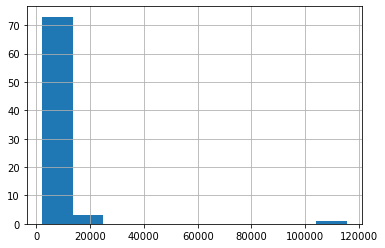

In [48]:
osvc_nejnovejsi['vykonavana_cinnost_hlavni'].hist(bins=10)